In [57]:
# Set up packages for lecture. Don't worry about understanding this code, but
# make sure to run it if you're following along.
import numpy as np
import babypandas as bpd
import pandas as pd
from matplotlib_inline.backend_inline import set_matplotlib_formats
import matplotlib.pyplot as plt
%reload_ext pandas_tutor
%set_pandas_tutor_options {'projectorMode': True}
set_matplotlib_formats("svg")
plt.style.use('fivethirtyeight')

np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option("display.max_rows", 7)
pd.set_option("display.max_columns", 8)
pd.set_option("display.precision", 2)

# Animations
from ipywidgets import interact

# Lecture 21 – The Normal Curve

## DSC 10, Summer 2022

### Announcements

- Homework 6 is due **Sat at 11:59pm**.
- Lab 7 is due **Tue at 11:59pm**.
- The Grade Report on Gradescope has been updated. Use it to get an idea of how you're doing.

### Agenda

- The normal curve and its many properties.
- Standard units and normal approximation.
- Revisit center and spread in the context of the normal curve.
- Introduction to the Central Limit Theorem.

### You Try: Review Question

> For a particular set of data points, Chebyshev's inequality states that at least $\frac{8}{9}$ of the data points are between -20 and 40. What is the standard deviation of the data?

### Review Question, solved

> For a particular set of data points, Chebyshev's inequality states that at least $\frac{8}{9}$ of the data points are between -20 and 40. What is the standard deviation of the data?

- Chebyshev's inequality states that at least $1 - \frac{1}{z^2}$ of values are within $z$ standard deviations of the mean.
- When $z = 3$, $1 - \frac{1}{z^2} = \frac{8}{9}$.
- So, -20 is 3 standard deviations below the mean, and 40 is 3 standard deviations above the mean.
- 10 is in the middle of -20 and 40, so the mean is 10.
- 3 standard deviations are between 10 and 40, so 1 standard deviation is 30 / 3 = 10.

## The normal curve

### The data

We'll work with a dataset containing the heights and weights of 5000 adult males.

In [58]:
height_and_weight = bpd.read_csv('data/height_and_weight.csv')
height_and_weight

,Height,Weight
0,73.85,241.89
1,68.78,162.31
2,74.11,212.74
...,...,...
4997,67.01,199.20
4998,71.56,185.91
4999,70.35,198.90


### Distribution of heights

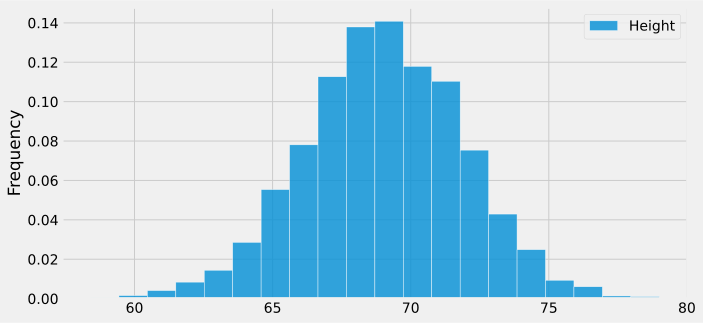

In [59]:
height_and_weight.plot(kind='hist', y='Height', density=True, ec='w', bins=20, alpha=0.8, figsize=(10, 5));

### Distribution of weights

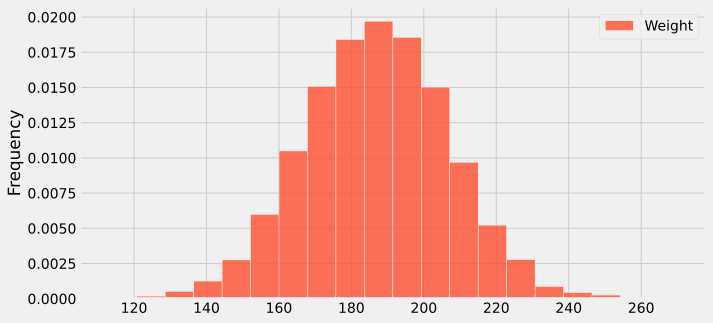

In [60]:
height_and_weight.plot(kind='hist', y='Weight', density=True, ec='w', bins=20, alpha=0.8, color='C1', figsize=(10, 5));

### A familiar shape

- We've seen this bell-like shape before.
- These bells are different in two key aspects: center and spread.

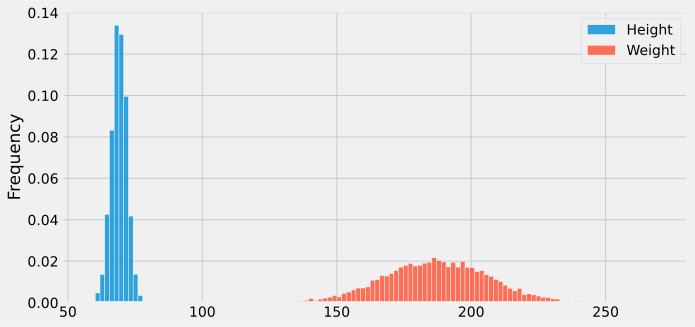

In [61]:
# Overlaid histogram
height_and_weight.plot(kind='hist', density=True, ec='w', bins=120, alpha=0.8, figsize=(10, 5));

Let's see if we can **transform** these distributions so that they look the same. 

### Centering

To **center** a distribution, subtract the mean from each value.

In [62]:
mean_height = height_and_weight.get('Height').mean()
mean_height

69.02634590621737

In [63]:
centered_height = height_and_weight.get('Height') - mean_height
centered_height

0       4.82
1      -0.24
2       5.08
        ... 
4997   -2.01
4998    2.53
4999    1.33
Name: Height, Length: 5000, dtype: float64

In [64]:
mean_weight = height_and_weight.get('Weight').mean()
mean_weight

187.02062065819288

In [65]:
centered_weight = height_and_weight.get('Weight') - mean_weight
centered_weight

0       54.87
1      -24.71
2       25.72
        ...  
4997    12.17
4998    -1.11
4999    11.88
Name: Weight, Length: 5000, dtype: float64

In [66]:
centered_height_and_weight = height_and_weight.assign(
    Height=centered_height,
    Weight=centered_weight
)
centered_height_and_weight

,Height,Weight
0,4.82,54.87
1,-0.24,-24.71
2,5.08,25.72
...,...,...
4997,-2.01,12.17
4998,2.53,-1.11
4999,1.33,11.88


### Centering

Let's plot these distributions now that they're centered.

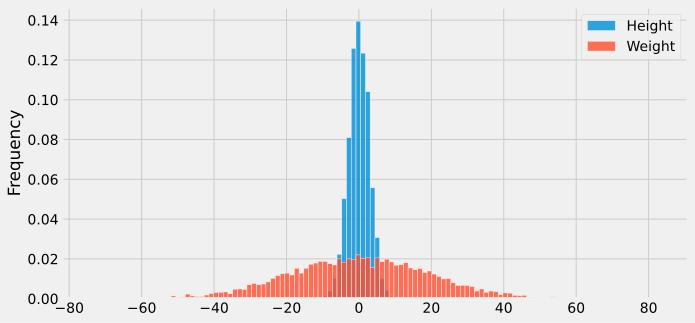

In [67]:
centered_height_and_weight.plot(kind='hist', density=True, ec='w', bins=120, alpha=0.8, figsize=(10, 5));

### Scaling

- Remember, our current goal is to transform the two distributions so that they look very similar.
- Right now they are both centered, but have different widths.
- To give them the same width, we **divide by the standard deviation**.
- Data that is centered and scaled is **standardized**.
    - mean = 0, SD = 1

In [68]:
std_height = np.std(height_and_weight.get('Height'))
std_height

2.863075878119538

In [69]:
std_weight = np.std(height_and_weight.get('Weight'))
std_weight

19.779176302396458

In [70]:
standardized_height_and_weight = centered_height_and_weight.assign(
    Height=centered_height_and_weight.get('Height') / std_height,
    Weight=centered_height_and_weight.get('Weight') / std_weight
)

Let's check that mean = 0, SD = 1. (Remember, `e-14` means "$10^{-14}$", which is a very small number.)

In [71]:
standardized_height_and_weight.get('Height').mean(), np.std(standardized_height_and_weight.get('Height'))

(1.6405921066109386e-14, 1.0)

In [72]:
standardized_height_and_weight.get('Weight').mean(), np.std(standardized_height_and_weight.get('Weight'))

(1.6398660207528336e-14, 1.0)

### Standardized histograms

Now that we've both centered and scaled the two distributions, let's see how they look.

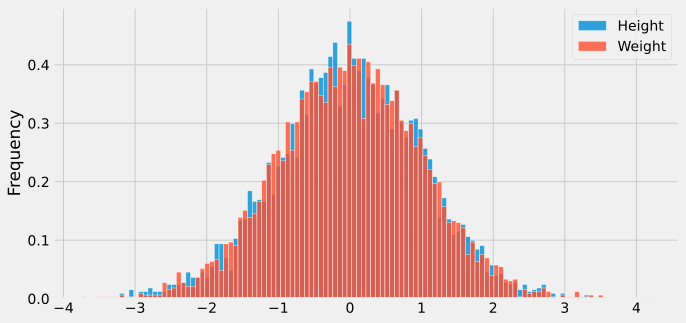

In [73]:
standardized_height_and_weight.plot(kind='hist', density=True, ec='w',bins=120, alpha=0.8, figsize=(10, 5));

These both look pretty similar!

### The standard normal curve

- The distributions we've seen look essentially the same once standardized.
- This shape is called the **standard normal curve** (or standard normal distribution).

$$
\phi(z) = \frac{1}{\sqrt{2 \pi}} e^{-\frac{1}{2}z^2}
$$


- You don't need to know the formula – just the shape!
- We'll just use the formula today to make plots.

### The standard normal curve

In [74]:
def normal_curve(z):
    return 1 / np.sqrt(2*np.pi) * np.exp((-z**2)/2)

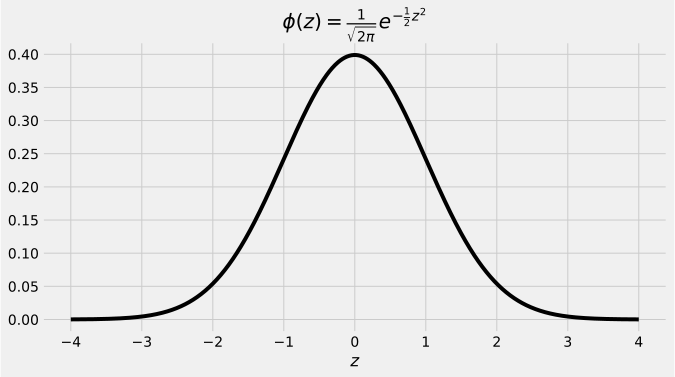

In [75]:
x = np.linspace(-4, 4, 1000)
y = normal_curve(x)

plt.figure(figsize=(10, 5))
plt.plot(x, y, color='black');
plt.xlabel('$z$');
plt.title(r'$\phi(z) = \frac{1}{\sqrt{2 \pi}} e^{-\frac{1}{2}z^2}$');

### Heights/weights are approximately normal

If a distribution follows this shape, we say it is roughly "normal".

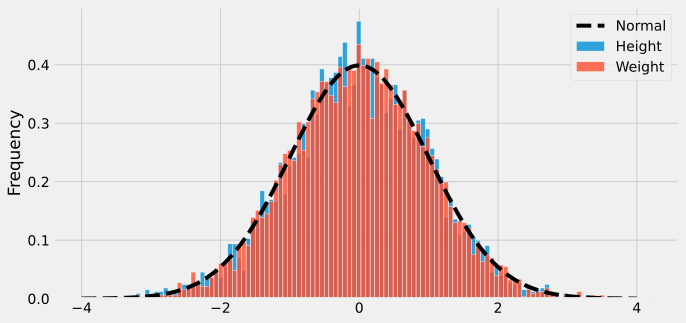

In [76]:
standardized_height_and_weight.plot(kind='hist', density=True, ec='w', bins=120, alpha=0.8, figsize=(10, 5));
plt.plot(x, y, color='black', linestyle='--', label='Normal')
plt.legend(loc='upper right');

### The standard normal distribution

- Think of the normal curve as a "continuous histogram".
- Its mean and median are both 0 – it is symmetric.
- It has inflection points at $\pm 1$.
    - More on this later.
- Like a histogram:
    - The total area underneath the normal curve is 1.
    - The area between $a$ and $b$ is the proportion of values between $a$ and $b$.

In [77]:
def normal_area(a, b, bars=False):
    ix = (x >= a) & (x <= b)
    plt.figure(figsize=(10, 5))
    plt.plot(x, y, color='black')
    plt.fill_between(x[ix], y[ix], color='gold')
    if bars:
        plt.axvline(a, color='red')
        plt.axvline(b, color='red')
    plt.title(f'Area between {np.round(a, 2)} and {np.round(b, 2)}')

interactive(children=(FloatSlider(value=-1.0, description='a', max=3.0, min=-4.0, step=0.25), FloatSlider(valu…

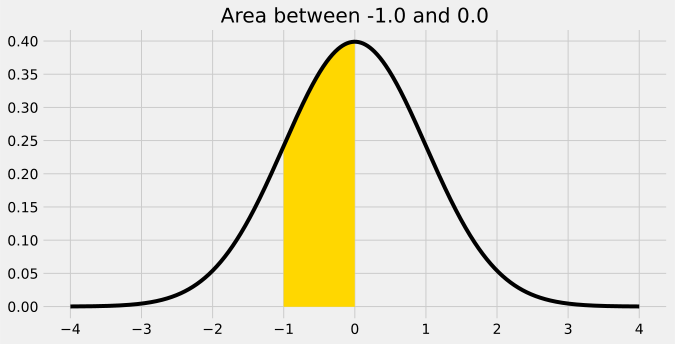

In [78]:
interact(normal_area, a=(-4, 3, 0.25), b=(-4, 4, 0.25), bars=False);

### The standard normal "CDF"

- Areas under curves are typically found via integration.
- However, there is no closed-form indefinite integral for the normal curve.
- Instead, we approximate through computation.
- The function `scipy.stats.norm.cdf(z)` computes the **area under the standard normal curve to the left of `z`**. In other words,

$$
\texttt{scipy.stats.norm.cdf(z)} = \int_{- \infty}^z \phi(x) \, dx
$$
- cdf stands for "cumulative density function".

### You Try: 

What will `scipy.stats.norm.cdf(0)` evaluate to? (Don't run the code, just predict.)

*Write your answer here*

In [79]:
from scipy import stats
stats.norm.cdf(0)

0.5

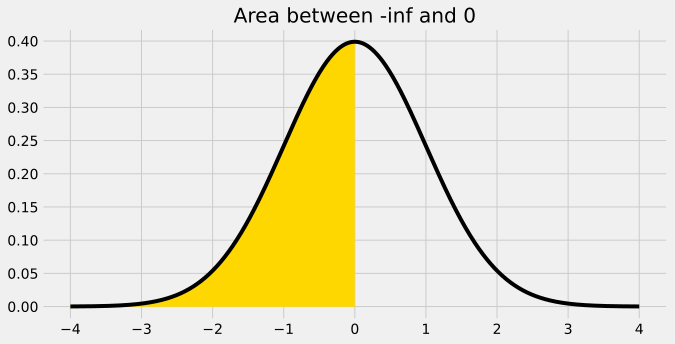

In [80]:
normal_area(-np.inf, 0)

### You Try: area in [2, inf]

Use `stats.norm.cdf` to find the area to the **right** of 2.

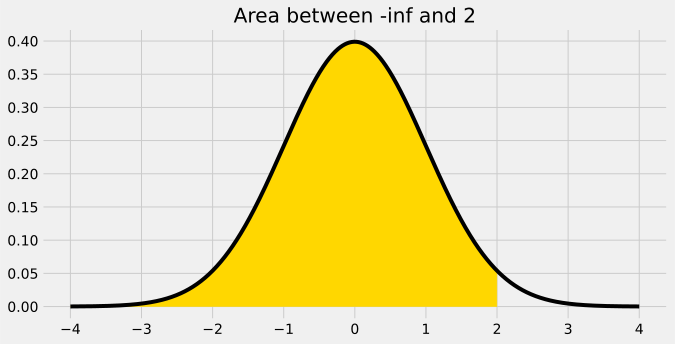

In [81]:
normal_area(-np.inf, 2)

In [82]:
stats.norm.cdf(2)

0.9772498680518208

Then, the area to the right of 2 is 1 minus the area to the left of 2.

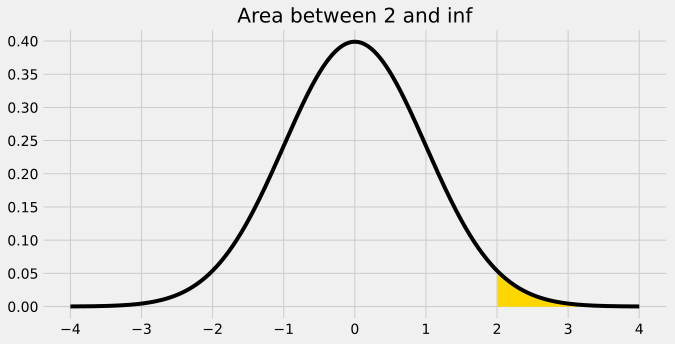

In [83]:
normal_area(2, np.inf)

In [84]:
1 - stats.norm.cdf(2)

0.02275013194817921

### You Try: area between [-1, 0]

Use `stats.norm.cdf` to compute the area between -1 and 0.

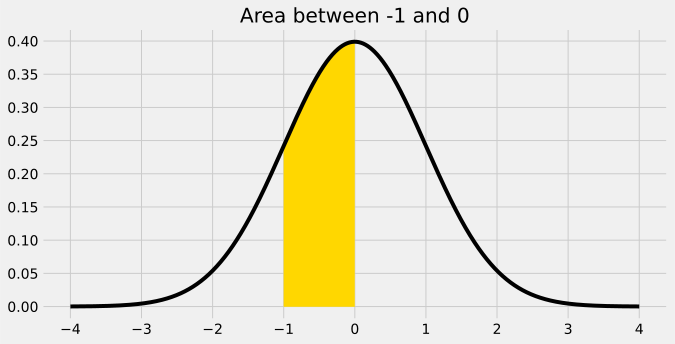

In [85]:
normal_area(-1, 0)

Strategy:

$$(\text{area from $-1$ to $0$}) = (\text{area left of $0$}) - (\text{area left of $-1$})$$

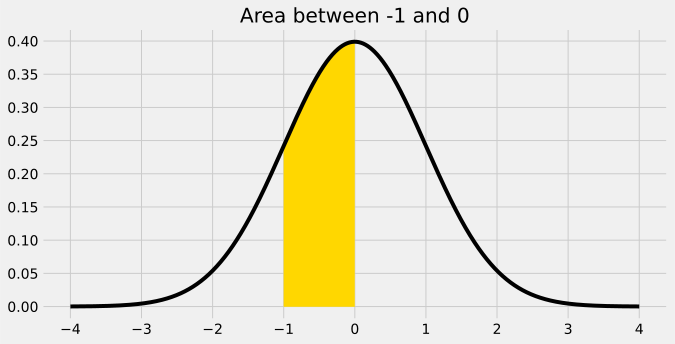

In [86]:
normal_area(-1, 0)

In [87]:
stats.norm.cdf(0) - stats.norm.cdf(-1)

0.3413447460685429

### General strategy for finding area

The area under a standard normal curve in the interval $[a, b]$ is 

```py
stats.norm.cdf(b) - stats.norm.cdf(a)
```

## Standard units and normal approximation

In [88]:
height_and_weight

,Height,Weight
0,73.85,241.89
1,68.78,162.31
2,74.11,212.74
...,...,...
4997,67.01,199.20
4998,71.56,185.91
4999,70.35,198.90


### Standard units

**Question:** What proportion of weights are between 200 and 225?

- We can determine the answer exactly, because we have access to all of the data.
- But, let's use fact that weights are roughly normal.
    - This is done often in settings where you don't have all of the data, just the mean and standard deviation.

### Histogram area within [200, 225]

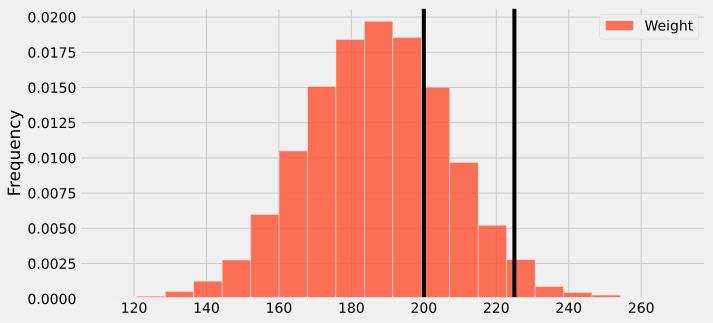

In [89]:
height_and_weight.plot(kind='hist', y='Weight', density=True, ec='w', bins=20, alpha=0.8, color='C1', figsize=(10, 5));
plt.axvline(200, color='black')
plt.axvline(225, color='black');

### Normal curve area within [?, ?]...

The question becomes, what two endpoints should we look for the area between on the standard normal curve?

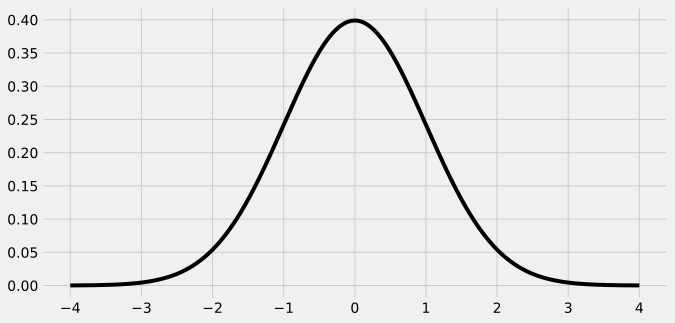

In [90]:
normal_area(0, 0)
plt.title('');

### Aside: standard units

- Define $$z(x) = \frac{x - \text{mean of all $x$s}}{\text{SD of all $x$s}}$$

- $z(x)$ converts $x$ to **standard units**, which represents the number of standard deviation $x$ is above the mean.
- Converting a variable to standard units is the same as **standardizing** it, which is what we did earlier in the lecture.

### Standard units

What does a weight of 225 become after standardization?

$$z(225) = \frac{225 - \text{mean weight}}{\text{SD of weight}}$$

In [91]:
225 - mean_weight

37.97937934180712

In [92]:
(225 - mean_weight) / std_weight

1.920169918158094

- Interpretation: 225 is 1.92 standard deviations above the mean weight.
- 225 becomes 1.92 in **standard units**.

### Standard units and area

- **Key idea: The $x$-axis in a plot of the standard normal curve is in standard units.**
    - e.g. the area between -1 and 1 is the proportion of values within 1 standard deviation of the mean.
- Suppose a distribution is (roughly) normal. Then, these are two are approximately equal:
    - The area between $a$ and $b$ in the histogram.
    - The area between $z(a)$ and $z(b)$ under a standard normal curve.

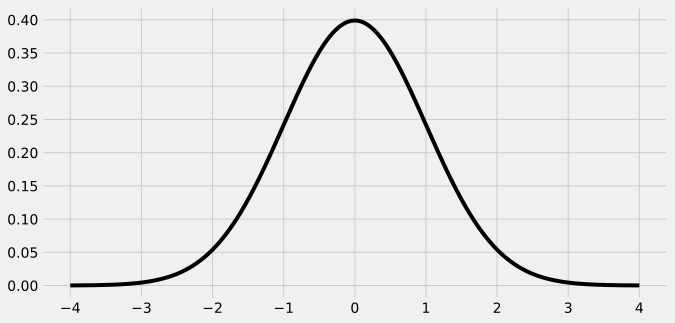

In [93]:
normal_area(0, 0)
plt.title('');

### You Try: Standard units and area

Find the proportion of weights between 200 and 225 using a normal approxmiation.

1. Convert 200 and 225 lbs to standard units.
1. Find the area in the interval using `stats.norm.cdf`.
1. Find the real proportion using `height_and_weight`, then compare with the approximation.
1. Give a real-world example of when we would want to use this approach.

In [94]:
left = (200 - mean_weight) / std_weight
left

0.6562143510614508

In [95]:
right = (225 - mean_weight) / std_weight
right

1.920169918158094

In [96]:
# Area between left and right in the standard normal curve
approximation = stats.norm.cdf(right) - stats.norm.cdf(left)
approximation

0.22842488819306006

**Interpretation:** approximately 22.8% of weights are between 200 and 225 (inclusive).

**Note that we only needed the mean and standard deviation of the weights to calculate this!**

### Normal curve area between $z(200)$ and $z(225)$

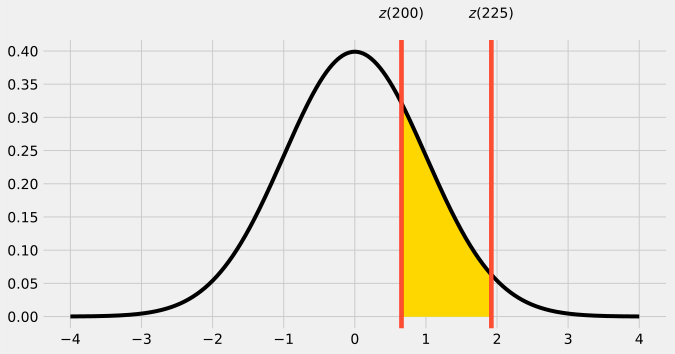

In [97]:
normal_area(left, right, bars=True)
plt.axvline(0.656, color='C1')
plt.axvline(1.92, color='C1')
plt.text(0.656, 0.45, '$z(200)$', ha='center')
plt.text(1.92, 0.45, '$z(225)$', ha='center')
plt.title('');

### Checking the approximation

In [98]:
# True proportion of values between 200 and 225
height_and_weight[
    (height_and_weight.get('Weight') >= 200) &
    (height_and_weight.get('Weight') <= 225)
].shape[0] / height_and_weight.shape[0]

0.2294

In [99]:
# Approximation using the standard normal curve
approximation

0.22842488819306006

Pretty good for an approximation! 🤩

### Summary: normal approximations

- Suppose we know the following about a distribution:
    - it is approximately normal,
    - its mean and standard deviation,
- Then, we can use the standard normal curve to compute the proportion of values in a given range without needing all of the data.

### Warning: standardization doesn't make a distribution normal!

- Consider the following distribution of Winter's Midterm Exam scores.

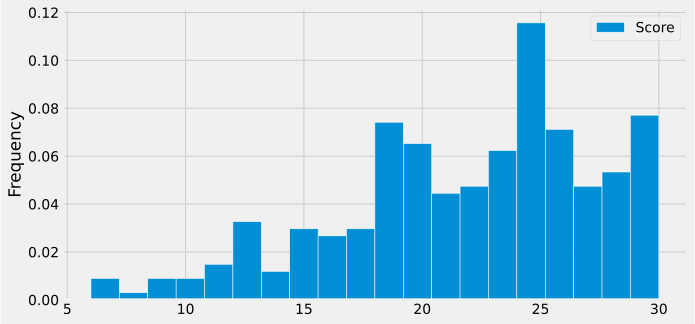

In [100]:
scores = bpd.read_csv('data/wi22_midterm_scores.csv').get(['Score'])
scores.plot(kind='hist', y='Score', bins=20, density=True, ec='w', figsize=(10, 5));

- The distribution above does not look normal.
- If we standardize the distribution above, it still won't look normal.

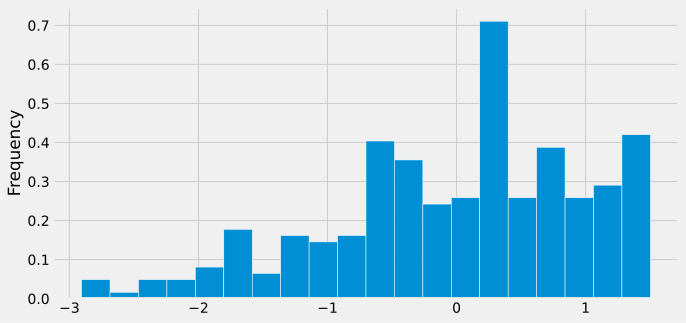

In [101]:
scores_standardized = (scores.get('Score') - scores.get('Score').mean()) / np.std(scores.get('Score'))
scores_standardized.plot(kind='hist', bins=20, density=True, ec='w', figsize=(10, 5));

## Center and spread, revisited

### Special cases

- As we just discovered, the $x$-axis in the standard normal curve represents standard units.
- Often times, we want to know the area within $z$ standard deviations of the mean.

|Percent in Range | Normal Distributions|
|---|---|
|$\text{average} \pm 1 \ \text{SD}$ | $\approx 68\%$ |
|$\text{average} \pm 2 \text{SDs}$ | $\approx 95\%$ |
|$\text{average} \pm 3\text{SDs}$ | $\approx 99.73\%$ |

### 68% of values are in [-1, 1]

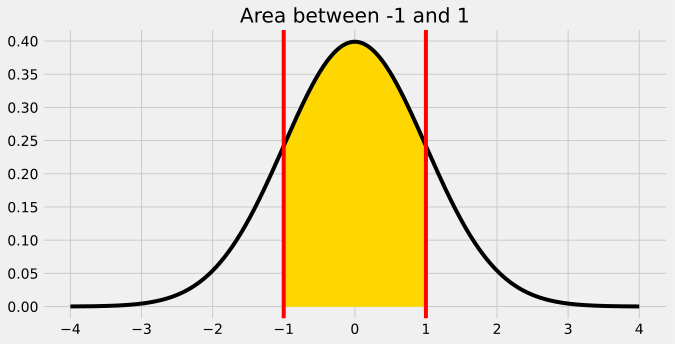

In [102]:
normal_area(-1, 1, bars=True)

In [103]:
stats.norm.cdf(1) - stats.norm.cdf(-1)

0.6826894921370859

This means that if a variable follows the standard normal distribution, approximately 68% of values will be within 1 SD of the mean.

### 95% of values are in [-2, 2]

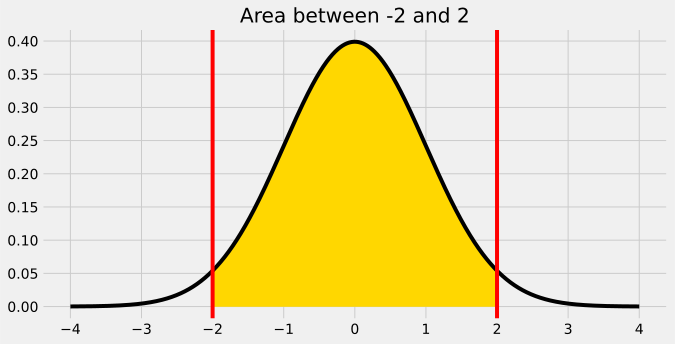

In [104]:
normal_area(-2, 2, bars=True)

In [105]:
stats.norm.cdf(2) - stats.norm.cdf(-2)

0.9544997361036416

This means that if a variable follows the standard normal distribution, approximately 95% of values will be within 2 SDs of the mean.

- This also means that 5% of values will be outside of 2 SDs from the mean.
- Since the normal curve is symmetric, it also means that 2.5% of values will be more than 2 SDs above the mean, and 2.5% of values will be more than 2 SDs below the mean.

### Chebyshev's inequality and the normal curve

- Last class, we looked at Chebyshev's inequality, which stated that the proportion of data within $z$ SDs of the mean is **at least** $1-\frac{1}{z^2}$.
    - This works for any distribution, and is a lower bound.
- If we know that the distribution is normal, we can be even more specific:


| Range | All Distributions (via Chebyshev's Inequality) | Normal Distributions|
|---|---|---|
| average $\pm \ 1$ SD | $\geq 0\%$ |$\approx 68\%$ |
| average $\pm \ 2$ SDs | $\geq 75\%$ | $\approx 95\%$ |
| average $\pm \ 3$ SDs | $\geq 88.8\%$ | $\approx 99.73\%$ |

- The percentages you see for normal distributions above are approximate, but are not lower bounds.

### Points of inflection

- Earlier, we mentioned that the standard normal curve has points of inflection at $z = \pm 1$.
    - Inflection point: where the curve goes from "opening down" to "opening up."
- We know that the $x$-axis of the standard normal curve represents standard units, so this means the points of inflection are at 1 standard deviation above and below the mean.
- This means that if a distribution is roughly normal, we can determine its standard deviation by looking for how far its point of inflection is from its center.

### Points of inflection: example

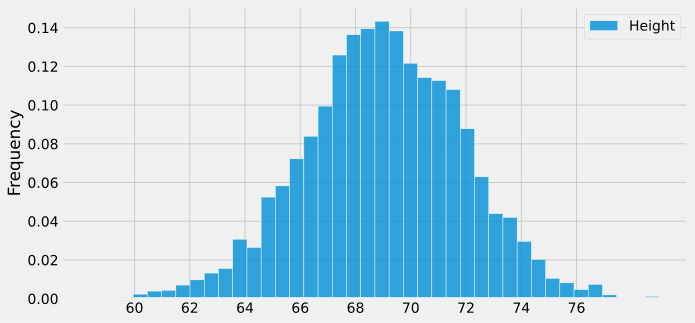

In [106]:
height_and_weight.plot(kind='hist', y='Height', density=True, ec='w', bins=40, alpha=0.8, figsize=(10, 5));
plt.xticks(np.arange(60, 78, 2));

- The center appears to be around 69.
- The points of inflection appear to be around 66 and 72.
- So, the standard deviation is roughly 72 - 69 = 3.

In [107]:
np.std(height_and_weight.get('Height'))

2.863075878119538

## Central Limit Theorem

### Something to think about...

When looking at the empirical distribution of a statistic, we've often seen a bell curve. Why is that? 🤔

### Bell-shaped data

- Bell curves often come up when the effect is the sum of multiple smaller effects.
- We've seen this to be true for height and weight.
    - E.g. many genes that each affect height a bit.
- There are many more examples...

### Example: Natural sleep duration 😴

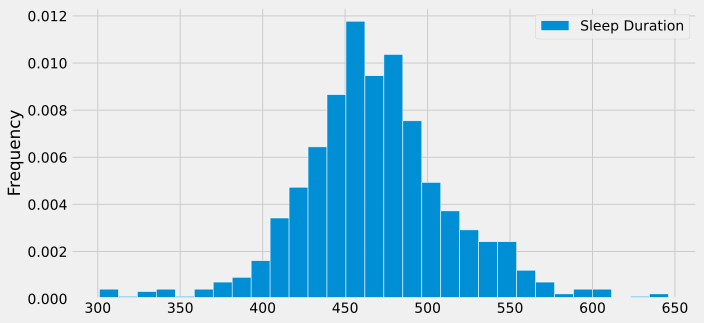

In [108]:
sleep = bpd.read_csv('data/sleep.csv').get(['Sleep Duration'])
sleep.plot(kind='hist', y='Sleep Duration', bins=30, density=True, ec='w', figsize=(10, 5));

### But...

- **...lots of data isn't bell-shaped!**
- Bell-shaped distributions are symmetric and only have one peak.
- But in reality, distributions are often skewed to one side and have multiple peaks.

### Example: Midterm Exam scores 💯

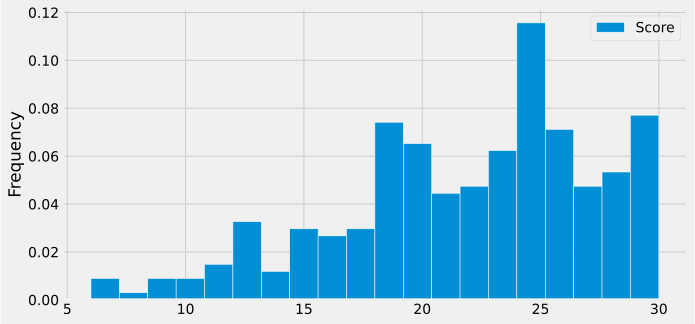

In [109]:
scores.plot(kind='hist', y='Score', bins=20, density=True, ec='w', figsize=(10, 5));

### Example: Flight delays ✈️

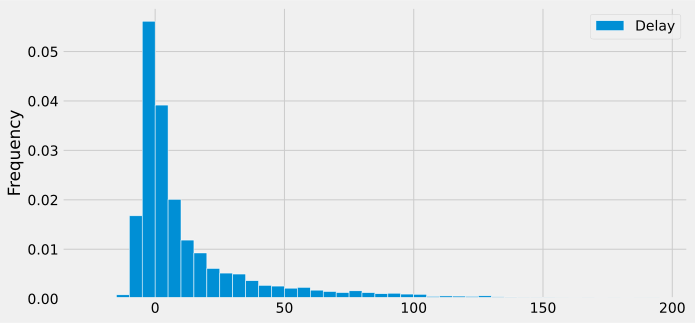

In [110]:
flights = bpd.read_csv('data/united_summer2015.csv').get(['Delay'])
flights.plot(kind='hist', y='Delay', bins=np.arange(-25, 200, 5), density=True, ec='w', figsize=(10, 5));

### But...

- It turns out that **even when the population distribution isn't bell-shaped, the empirical distribution of sample statistics often are**.
- Let's consider the distribution of the sample mean.

### Example: Flight delays ✈️

- We want to know the average flight delay.
- To do this, we take a random sample of flights and compute the sample mean.
- The sample mean could have been different, so we'd like some sense of how much the sample mean could vary – we'd like to know the distribution of the sample mean.
- We now know that we can use the bootstrap to estimate this distribution through just a single sample.
    - But in this case, since we have the population, we'll just repeatedly sample from it.

In [114]:
n_samples = 1000

sample_means = np.array([])

for i in np.arange(n_samples):
    sample = flights.sample(2000, replace=True) # Sampling directly from the population, with replacement
    sample_mean = sample.get('Delay').mean()
    sample_means = np.append(sample_means, sample_mean)
    
# Look at just the first 10 sample means
sample_means[:10]

array([16.09, 16.77, 17.43, 16.24, 17.3 , 17.77, 18.01, 17.17, 17.05,
       16.64])

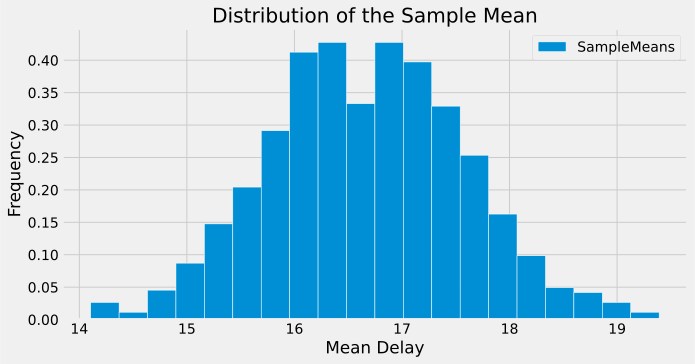

In [112]:
bpd.DataFrame().assign(SampleMeans=sample_means).plot(kind='hist', bins=20, density=True, ec='w', figsize=(10, 5))
plt.xlabel('Mean Delay')
plt.title('Distribution of the Sample Mean');

### What just happened ⁉️

- The population was not bell-shaped – it was extremely skewed.
- But distribution of sample mean **is** roughly bell-shaped.
- Many of the bootstrapped distributions we've seen in this class were bell-shaped.
- This appears to be a deep fact about randomness.

### Central Limit Theorem

> The Central Limit Theorem (CLT) says that the probability distribution of the **sum or average** of a large random sample drawn with replacement will be roughly normal, regardless of the distribution of the population from which the sample is drawn.

More on this next time.

## Why does it matter?

- Normal curves come up in lots of real-world scenarios.
    - Commute times
    - Brownian motion (physics)
- Easy to summarize data: if it's normal, all you need is the mean and SD.
- Building block for deeper ideas in statistics.
    - Regression
    - CLT
    - Confidence intervals
- **Next time:** more on CLT.